# Dimensionality Reduction

In [1]:
from pathlib import Path

import h5py
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [2]:
rc("font", family="serif")
rc("text", usetex=True)

In [3]:
SIZE = 2500

with h5py.File("data/dataset.hdf5", "r") as f:
    src_dom = f["sdss"]
    src_X = minmax_scale(src_dom["X_va"][:SIZE], feature_range=(-1, 1), axis=1)
    src_y = src_dom["y_va"][:SIZE]
    trg_dom = f["lamost"]
    trg_X = minmax_scale(trg_dom["X_va"][:SIZE], feature_range=(-1, 1), axis=1)
    trg_y = trg_dom["y_va"][:SIZE]

X = np.concatenate([src_X , trg_X])
y = np.concatenate([src_y, trg_y + 2])
labels = ["source", "source QSO", "target", "target QSO"]
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([2217,  283, 2490,   10]))

## Principal Component Analysis (PCA)

In [4]:
from sklearn.decomposition import PCA

<BarContainer object of 10 artists>

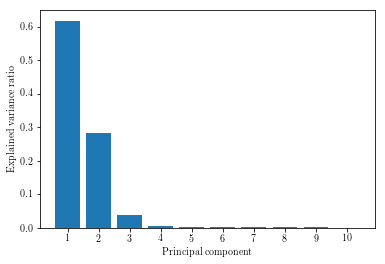

In [5]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

pc = np.arange(1, pca.n_components + 1)
ax = plt.axes(
    xlabel="Principal component",
    ylabel="Explained variance ratio",
    xticks=pc
)
plt.bar(pc, pca.explained_variance_ratio_)

In [6]:
for l_idx, l in enumerate(labels):
    ax.scatter(X[y == l_idx, 0], X[y == l_idx, 1], label=l, s=0.1)
    legend = ax.legend()
    for handle in legend.legendHandles:
        handle._sizes = [1]

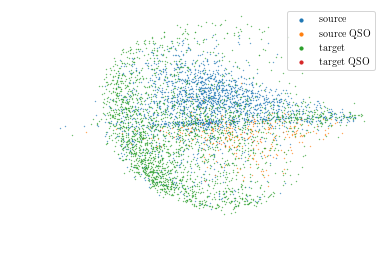

In [7]:
def plot_embedding(X, ax):
    for l_idx, l in enumerate(labels):
        ax.scatter(X[y == l_idx, 0], X[y == l_idx, 1], label=l, s=0.1)
    legend = ax.legend()
    for handle in legend.legendHandles:
        handle._sizes = [10]
    return ax

ax = plt.axes(xlabel="pc1", ylabel="pc2")
ax = plot_embedding(X_pca, ax)
ax.set_axis_off()
plt.savefig(str(Path("figs") / "pca.pdf"))

## t-distributed Stochastic Neighbor Embedding (t-SNE)

In [8]:
from sklearn.manifold import TSNE

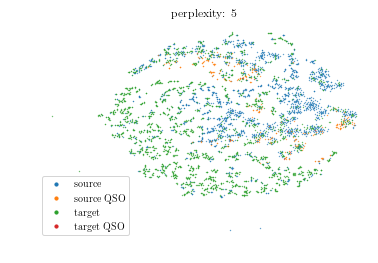

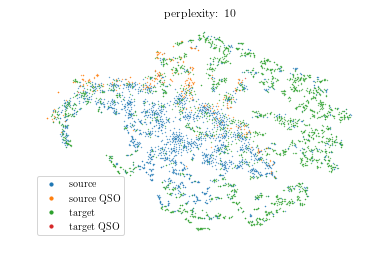

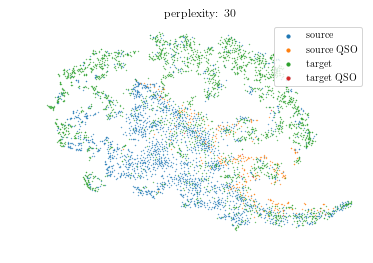

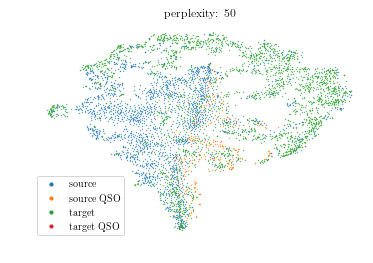

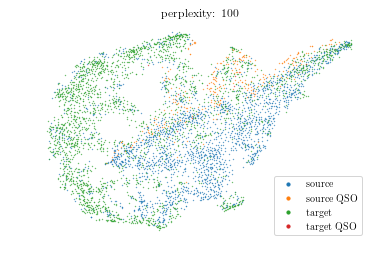

In [9]:
for perplexity in [5, 10, 30, 50, 100]:
    tsne = TSNE(perplexity=perplexity, n_components=2, n_jobs=-1)
    X_tsne = tsne.fit_transform(X)
    ax = plt.axes(title="perplexity: " + str(perplexity))
    ax = plot_embedding(X_tsne, ax)
    ax.set_axis_off()
    plt.show()

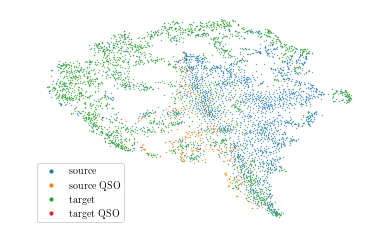

In [10]:
tsne = TSNE(perplexity=50, n_components=2, n_jobs=-1)
X_tsne = tsne.fit_transform(X)
ax = plt.axes()
ax = plot_embedding(X_tsne, ax)
ax.set_axis_off()
plt.savefig(str(Path("figs") / "tsne.pdf"))

## Uniform Manifold Approximation and Projection (UMAP)

In [11]:
import umap

/data/podondra/qso/venv/lib/python3.5/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.5/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/data/podondra/qso/venv/lib/python3.5/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.5/site-packages/umap/utils.py", line 409:
@numba.njit(par

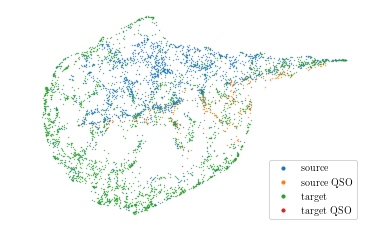

In [12]:
reducer = umap.UMAP()
X_umap = reducer.fit_transform(X)

ax = plt.axes()
ax = plot_embedding(X_umap, ax)
ax.set_axis_off()
plt.savefig(str(Path("figs") / "umap.pdf"))